In [24]:
import scipy as sp
import numpy as np
import pylab as plt
from numpy import math
from scipy.integrate import odeint

# LIF


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:

# setup parameters and state variables
# setup parameters and state variables
T = 50                        # total time to simulate (msec)
dt = 0.125                    # simulation time step (msec)
time = np.arange(0, T+dt, dt) # time array, discretization of time 
t_rest = 0                    # initial refractory time

# LIF properties
Vm = np.zeros(len(time)) # potential (V) trace over time
Rm = 1                   # resistance (kOhm)
Cm = 10                  # capacitance (uF)
tau_m = Rm*Cm            # time constant (msec)
tau_ref = 4              # refractory period (msec)
Vth = 1                  # spike threshold (V)
V_spike = 10.0           # spike delta (V)

I = 1.5*np.ones(len(time))        # input current (A)

# iterate over each time step
for i, t in enumerate(time):
    if t > t_rest:

        Vm[i] = Vm[i-1] + (-Vm[i-1] + I[i]*Rm ) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref


(-2.0, 16.0)

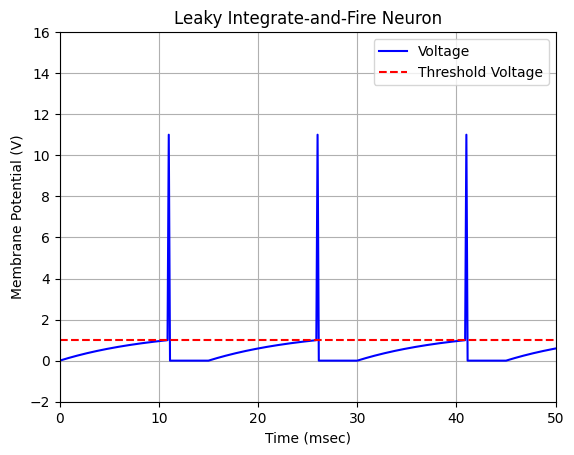

In [10]:

plt.figure()

plt.plot(time, Vm, color = 'b', label='Voltage')
plt.plot([0,50], [Vth,Vth], color='red', linestyle='--', label='Threshold Voltage')
plt.legend(loc=1)
plt.grid()
plt.title('Leaky Integrate-and-Fire Neuron')
plt.ylabel('Membrane Potential (V)')
plt.xlabel('Time (msec)')
plt.xlim(0,50)
plt.ylim(-2,16)
